# House Market

### 1 - Import librairies

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

### 2 - Let's go a little further into python.

1. Download the four files “superficie.csv” / “nombre_de_sdb.csv” / “nombre_de_chambres.csv” / "house_price.csv"

2. Read the files and create the 4 corresponding Dataframes


In [34]:
# Lire les fichiers et créer les 4 Dataframes correspondants
house_price = pd.read_csv("house_price.csv")
rooms = pd.read_csv("nombre_de_chambres.csv",header=None)
bathrooms = pd.read_csv("nombre_de_sdb.csv",header=None)
surface = pd.read_csv("superficie.csv",header=None)

### 3 - Give a column name to the three datasets that don't have a header in the source file

In [35]:
# renomage des colonnes
surface.columns = ['id', 'surface']
bathrooms.columns = ['id','bathrooms']
rooms.columns = ['id', 'rooms']

In [36]:
surface.head(2)

,id,surface
0,0,28844
1,1,27667


In [37]:
bathrooms.head(2)

,id,bathrooms
0,0,2
1,1,1


In [38]:
rooms.head(2)

,id,rooms
0,0,1
1,1,4


In [39]:
house_price.head(2)

,Unnamed: 0,id,house_price
0,0,14,1918154.0
1,1,30,739142.0


### 4 - Make an inner join of these four datasets into a single dataframe.

In [40]:
# joindre les 4 dataset
dataset = surface.merge(bathrooms, on='id').merge(rooms, on='id').merge(house_price, on='id')
dataset.head(3)

,id,surface,bathrooms,rooms,Unnamed: 0,house_price
0,0,28844,2,1,32,1421908.0
1,1,27667,1,4,71,1305091.0
2,2,14742,1,1,65,164373.0


In [41]:
# dataset = surface.merge(bathrooms).merge(rooms).merge(house_price)

### 5 - What is the average surface area of the houses in our dataset?


In [42]:
dataset['surface'].mean().round(2)

20439.77

In [43]:
# 20439.77


In [44]:
dataset.describe()

,id,surface,bathrooms,rooms,Unnamed: 0,house_price
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,49.500000,20439.770000,1.960000,2.420000,49.500000,7.677479e+05
std,29.011492,6225.890598,0.803025,1.046205,29.011492,6.097362e+05
min,0.000000,10198.000000,1.000000,1.000000,0.000000,1.014480e+05
25%,24.750000,14709.750000,1.000000,2.000000,24.750000,1.891252e+05
50%,49.500000,20829.000000,2.000000,2.000000,49.500000,5.880165e+05
75%,74.250000,26125.750000,3.000000,3.000000,74.250000,1.239923e+06
max,99.000000,29931.000000,3.000000,4.000000,99.000000,1.992653e+06


### 6 -What is the median and average number of rooms?

In [45]:
# mediane
median = dataset['rooms'].median()
median

2.0

In [46]:
# average
average = dataset['rooms'].mean().round(2)
average

2.42

###  7 - What is the average cost of a house?

In [47]:
# average
average = dataset['house_price'].mean().round(2)
average

767747.87

### 8 - What is the average cost of a house, depending on the number of rooms it has?

In [48]:
dataset.head(2)

,id,surface,bathrooms,rooms,Unnamed: 0,house_price
0,0,28844,2,1,32,1421908.0
1,1,27667,1,4,71,1305091.0


In [49]:
dataset.groupby("rooms")["house_price"].mean().round(2)

rooms
1    980774.87
2    642086.26
3    645904.59
4    888045.63
Name: house_price, dtype: float64

### 9 - The average cost per room doesn't tell us much. Let's try to categorize by size.

10. The average cost per room doesn't tell us much. Let's try to categorize by size.

  - Create a new column in your dataset that we'll call home_size
Create three categories that respectively correspond to :

      - "very large" == "a house larger than 25,000 sqrt_feet"
      
      - "large" == "a house between 20,000 and 25,000 sqrt_feet"
      
      - "medium" == "a house between 15,000 and 20,000 sqrt_feet"
    
      - "small" == "a house between 10,000 and 15,000 sqrt_feet" 
    
      - "very small" == a house less than 10,000 sqrt_feet"
      
Fill in the corresponding rows in the house_size column.

In [50]:
dataset['house_size'] = dataset['surface'].apply(lambda x : 'very large' if x > 25000
                                                      else 'large' if (x > 20000) and (x <= 25000)
                                                      else 'medium' if (x > 15000) and (x <= 20000)
                                                      else 'small' if (x > 10000) and (x <= 15000)
                                                      else 'very small')
display(dataset)

,id,surface,bathrooms,rooms,Unnamed: 0,house_price,house_size
0,0,28844,2,1,32,1421908.0,very large
1,1,27667,1,4,71,1305091.0,very large
2,2,14742,1,1,65,164373.0,small
3,3,28089,3,4,88,1441714.0,very large
4,4,11713,1,2,49,108290.0,small
...,...,...,...,...,...,...,...
95,95,11417,3,3,39,132599.0,small
96,96,12126,1,2,15,155828.0,small
97,97,16390,1,2,13,237061.0,medium
98,98,23738,1,2,9,976422.0,large


### What is the average cost of a house depending on its size category?


In [51]:
dataset.groupby('house_size')['house_price'].mean()

house_size
large         7.325385e+05
medium        3.256948e+05
small         1.561387e+05
very large    1.552456e+06
Name: house_price, dtype: float64

### Apply the code below to view your result. What can you conclude?

c:\Users\patri\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


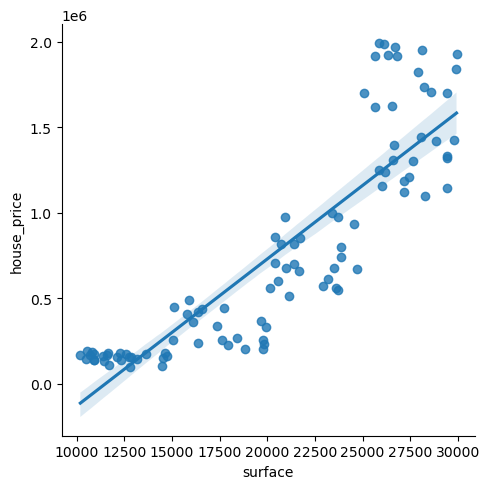

In [52]:
import seaborn as sns
%matplotlib inline
sns.lmplot(x = "surface", y="house_price", data = dataset)